In [1]:
import matplotlib
from pylab import *
%matplotlib inline
n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals

def initialize():
    global config, nextconfig, density
    density = []
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig, density
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
    density.append(sum(sum(density))/n**2)
    matplotlib.pyplot.plot(range(len(density)),density)
    print(density)

def update():
    global config, nextconfig, density
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config


[0.0]


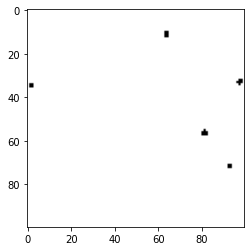

In [2]:
initialize()
for i in range(10):
    update()
observe()

In [ ]:
n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals

def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

In [ ]:
import numpy as np
final_density=[]
for p in np.linspace(0,1,100):
    initialize()
    for step in range(200):
        update()
    final_density.append(sum(sum(config)))
matplotlib.pyplot.plot(range(len(final_density)),final_density)

for index,value in enumerate(final_density):
    if value==n**2:
        print((index-1)*0.01)
        break
        
matplotlib.pyplot.plot(range(len(final_density)),final_density)